In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!unzip "/content/drive/My Drive/test_Bh8pGW3.zip"
!unzip "/content/drive/My Drive/train_DETg9GD.zip"

Archive:  /content/drive/My Drive/test_Bh8pGW3.zip
   creating: Test/
  inflating: test.csv                
  inflating: Test/10.jpg             
  inflating: Test/1000.jpg           
  inflating: Test/10002.jpg          
  inflating: Test/10003.jpg          
  inflating: Test/10005.jpg          
  inflating: Test/10006.jpg          
  inflating: Test/1001.jpg           
  inflating: Test/10010.jpg          
  inflating: Test/10012.jpg          
  inflating: Test/10014.jpg          
  inflating: Test/10020.jpg          
  inflating: Test/10022.jpg          
  inflating: Test/10024.jpg          
  inflating: Test/10029.jpg          
  inflating: Test/10032.jpg          
  inflating: Test/10033.jpg          
  inflating: Test/10037.jpg          
  inflating: Test/10039.jpg          
  inflating: Test/10042.jpg          
  inflating: Test/10044.jpg          
  inflating: Test/10049.jpg          
  inflating: Test/10052.jpg          
  inflating: Test/10054.jpg          
  inflating: Test/

In [4]:
pip install scipy==1.1.0

  Using cached https://files.pythonhosted.org/packages/a8/0b/f163da98d3a01b3e0ef1cab8dd2123c34aee2bafbb1c5bffa354cc8a1730/scipy-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.3
    Uninstalling scipy-1.3.3:
      Successfully uninstalled scipy-1.3.3


In [0]:
import os
import random

import pandas as pd
from scipy.misc import imread
import matplotlib.pyplot as plt


Loading Train and Test CSV Files

In [0]:
root_dir = os.path.abspath('.')


train = pd.read_csv( 'train.csv')
test = pd.read_csv('test.csv')

Printing a Random Image from training data

In [4]:
i = random.choice(train.index)

img_name = train.ID[i]
img = imread(os.path.join('', 'Train', img_name))

print("Age:", train.Class[i])

Age: MIDDLE


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


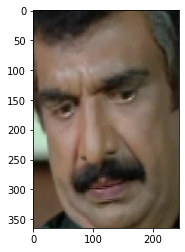

In [5]:
plt.imshow(img)

Resizing all training and test images to 32x32

In [6]:
from scipy.misc import imresize
import numpy as np
data_dir=''
temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Train', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

train_x = np.stack(temp)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [7]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Test', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


Normalizing the data

In [0]:
train_x = train_x / 255.
test_x = test_x / 255.

One hot encoding the data

In [8]:
import keras
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

Using TensorFlow backend.


Splitting the training data into further training and validation(or test)data

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15924, 32, 32, 3), (3982, 32, 32, 3), (15924, 3), (3982, 3))

Applying data augmentation 

In [0]:
from keras.preprocessing.image import ImageDataGenerator


trainAug = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [13]:
trainAug.fit(X_train)
X_train.shape

(15924, 32, 32, 3)

Intializing hyperparameters

In [0]:
input_num_units = (32, 32, 3)

epochs = 100
batch_size = 32
#INIT_LR = 1e-5


Implementing a CNN from scratch with LeakyReLU activation and then training the Model

In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from keras.layers import *
checkpointer = ModelCheckpoint(filepath='weights_{epoch:03d}_{val_acc:.3f}.hdf5', verbose=1, save_best_only=True, monitor="val_loss")
es = EarlyStopping(monitor='val_loss', patience=5,verbose=1)
#optss = Adam(lr=INIT_LR, decay=INIT_LR / epochs)
model = Sequential([
        BatchNormalization(input_shape = (32,32,3)),
        Convolution2D(32,(5,5),input_shape=input_num_units, activation='linear',padding='same'),
        LeakyReLU(alpha = 0.3),
        BatchNormalization(),
        Convolution2D(32,(5,5), activation='linear',padding='same'),
        LeakyReLU(alpha = 0.3),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
        Convolution2D(64,(5,5), activation='linear',padding='same'),
        LeakyReLU(alpha = 0.3),
        BatchNormalization(),
        Convolution2D(64,(5,5), activation='linear',padding='same'),
        LeakyReLU(alpha = 0.3),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
        Flatten(),
        Dropout(0.3),
        Dense(384, activation='linear'),
        LeakyReLU(alpha = 0.3),
        Dropout(0.6),
        Dense(3, activation='softmax')
        ])
model.compile(optimizer = 'adam' , loss='categorical_crossentropy', metrics=['accuracy'])
trained_model1 = model.fit(X_train, y_train, nb_epoch=epochs, batch_size=batch_size, validation_data=(X_test, y_test),callbacks=[checkpointer,es])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 15924 samples, validate on 3982 samples
Epoch 1/100
15924/15924 [==============================] - 9s 584us/step - loss: 1.9488 - acc: 0.5541 - val_loss: 0.8125 - val_acc: 0.6414

Epoch 00001: val_loss improved from inf to 0.81247, saving model to weights_001_0.641.hdf5
Epoch 2/100
15924/15924 [==============================] - 8s 515us/step - loss: 0.8591 - acc: 0.6319 - val_loss: 0.7380 - val_acc: 0.6680

Epoch 00002: val_loss improved from 0.81247 to 0.73805, saving model to weights_002_0.668.hdf5
Epoch 3/100
15924/15924 [==============================] - 8s 507us/step - loss: 0.7735 - acc: 0.6594 - val_loss: 0.7495 - val_acc: 0.6750

Epoch 00003: val_loss did not improve from 0.73805
Epoch 4/100
15924/15924 [==============================] - 8s 507us/step - loss: 0.7570 - acc: 0.6746 - val_loss: 0.6864 - val_acc: 0.6976

Epoch 00004: val_loss improved from 0.73805 to 0.68641, saving model to weights_004_0.698.hdf5
Epoch 5/100
15924/15924 [==============================] - 

Implementing transfer learning using DenseNet169

In [19]:
from keras.applications import DenseNet169
dense_conv = DenseNet169(include_top=False, weights=None, input_shape=input_num_units, pooling='Max', classes=3) #Removing the fully connected layers 

model1 = Sequential()
 

model1.add(dense_conv)
 
#Adding fully connected layers
model1.add(Flatten())
model1.add(Dropout(0.3))
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(3, activation='softmax'))
model1.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Model)          (None, 1, 1, 1664)        12642880  
_________________________________________________________________
flatten_3 (Flatten)          (None, 1664)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1664)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               426240    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 771       
Total params: 13,069,891
Trainable params: 12,911,491
Non-trainable params: 158,400
___________________________________

In [20]:
checkpointer = ModelCheckpoint(filepath='weights_{epoch:03d}_{val_acc:.3f}.hdf5', verbose=1, save_best_only=True, monitor="val_loss")
es = EarlyStopping(monitor='val_loss', patience=5,verbose=1)
model1.compile(optimizer = 'adam' , loss='categorical_crossentropy', metrics=['accuracy'])
trained_model2 = model1.fit(X_train, y_train, nb_epoch=epochs, batch_size=batch_size, validation_data=(X_test, y_test),callbacks=[checkpointer,es])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 15924 samples, validate on 3982 samples
Epoch 1/100
15924/15924 [==============================] - 143s 9ms/step - loss: 0.9635 - acc: 0.5866 - val_loss: 0.8373 - val_acc: 0.6193

Epoch 00001: val_loss improved from inf to 0.83725, saving model to weights_001_0.619.hdf5
Epoch 2/100
15924/15924 [==============================] - 89s 6ms/step - loss: 0.7907 - acc: 0.6473 - val_loss: 0.7788 - val_acc: 0.6650

Epoch 00002: val_loss improved from 0.83725 to 0.77877, saving model to weights_002_0.665.hdf5
Epoch 3/100
15924/15924 [==============================] - 89s 6ms/step - loss: 0.7520 - acc: 0.6675 - val_loss: 0.7284 - val_acc: 0.6753

Epoch 00003: val_loss improved from 0.77877 to 0.72845, saving model to weights_003_0.675.hdf5
Epoch 4/100
15924/15924 [==============================] - 90s 6ms/step - loss: 0.7519 - acc: 0.6745 - val_loss: 1.1192 - val_acc: 0.4606

Epoch 00004: val_loss did not improve from 0.72845
Epoch 5/100
15924/15924 [==============================] - 89s

Training and Loss Accuracy of CNN without transfer learning

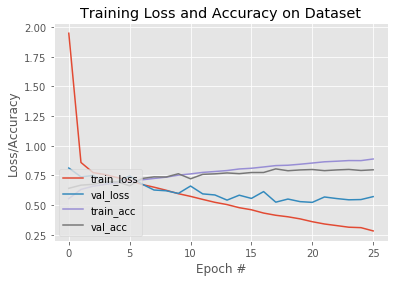

In [22]:
N = 26
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), trained_model1.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), trained_model1.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), trained_model1.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), trained_model1.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

Training and Loss Accuracy of CNN with transfer learning

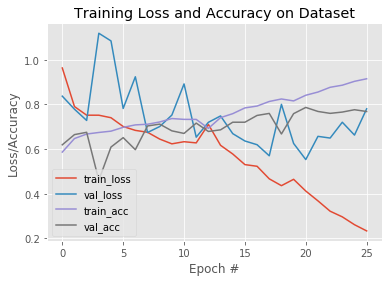

In [23]:
N = 26
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), trained_model2.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), trained_model2.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), trained_model2.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), trained_model2.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()